In [55]:
import keras
import pandas as pd
from keras import layers
from sklearn import preprocessing
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [36]:
class Preprocess:
    def __init__(self,df_path):
        self.df = pd.read_csv(df_path)
        self.df = self.df.sort_values('Class')
        
    def scale_df(self):
        sc = StandardScaler()
        self.df['Time'] = sc.fit_transform(self.df['Time'].values.reshape(-1, 1))
        self.df['Amount'] = sc.fit_transform(self.df['Amount'].values.reshape(-1, 1))
    
    def min_max_df(self):
        min_max_scaler = preprocessing.MinMaxScaler()
        self.x_scaled = min_max_scaler.fit_transform(self.df)
        self.df = pd.DataFrame(self.x_scaled,columns=self.df.columns.tolist())
    
    def split_data(self, fraction, flag):
        if flag == 'train':
            self.df = self.df[:round(len(self.df)*fraction/100)]
        if flag == 'test':
            self.df = self.df[round(len(self.df)*fraction/100):]
        x = self.df.loc[:, self.df.columns != 'Class']
        return x

In [37]:
pre = Preprocess('creditcard.csv')

In [38]:
pre.scale_df()

In [39]:
pre.min_max_df()

In [40]:
x_train = pre.split_data(60, 'train')

In [41]:
x_test = pre.split_data(60, 'test')

In [50]:
class autoencoder:
    
    def __init__(self, x_train, x_test):
        self.x_train = x_train
        self.x_test = x_test
    
    def create_model(self):
        input_img = keras.Input(shape=(self.x_train.shape[1],))
        encoded = layers.Dense(15, activation='relu')(input_img)
        encoded = layers.Dropout(0.4)(encoded)
        encoded = layers.Dense(8, activation='relu')(encoded)
        encoded = layers.Dropout(0.4)(encoded)
        encoded = layers.Dense(4, activation='relu')(encoded)
        decoded = layers.Dropout(0.4)(encoded)
        decoded = layers.Dense(8, activation='relu')(encoded)
        decoded = layers.Dropout(0.4)(decoded)
        decoded = layers.Dense(15, activation='relu')(decoded)
        decoded = layers.Dense(self.x_train.shape[1], activation='sigmoid')(decoded)
        self.autoencoder = keras.Model(input_img, decoded)
    
    def compile_model(self):
        self.autoencoder.compile(loss='binary_crossentropy',optimizer='adam')
        self.autoencoder.summary()
        
    
    def fit_model(self):
        early_stop = keras.callbacks.EarlyStopping(
                    monitor='val_loss',
                    min_delta=0.0001,
                    patience=10,
                    verbose=1, 
                    mode='min',
                    restore_best_weights=True)
        self.history = self.autoencoder.fit(self.x_train, self.x_train,
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_data=(self.x_test, self.x_test),
                callbacks = [early_stop],
                verbose=1)
        
    def plot_model(self):
        plt.plot(self.history.history['loss'], linewidth=2, label='Train')
        plt.plot(self.history.history['val_loss'], linewidth=2, label='Test')
        plt.legend(loc='upper right')
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.show()
        
    def save_model(self,path):
        self.autoencoder.save(path)

In [51]:
ae = autoencoder(x_train, x_test)

In [52]:
ae.create_model()

In [53]:
ae.compile_model()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 15)                465       
_________________________________________________________________
dropout_9 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 128       
_________________________________________________________________
dropout_10 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 40  

In [54]:
ae.fit_model()

Train on 170884 samples, validate on 68354 samples
Epoch 1/50
170884/170884 [==============================] - 10s 56us/step - loss: 0.5951 - val_loss: 0.5900
Epoch 2/50
170884/170884 [==============================] - 9s 50us/step - loss: 0.5888 - val_loss: 0.5894
Epoch 3/50
170884/170884 [==============================] - 9s 51us/step - loss: 0.5885 - val_loss: 0.5904
Epoch 4/50
170884/170884 [==============================] - 9s 50us/step - loss: 0.5884 - val_loss: 0.5907
Epoch 5/50
170884/170884 [==============================] - 9s 51us/step - loss: 0.5884 - val_loss: 0.5905
Epoch 6/50
170884/170884 [==============================] - 9s 50us/step - loss: 0.5883 - val_loss: 0.5911
Epoch 7/50
170884/170884 [==============================] - 9s 51us/step - loss: 0.5883 - val_loss: 0.5907
Epoch 8/50
170884/170884 [==============================] - 9s 50us/step - loss: 0.5883 - val_loss: 0.5907
Epoch 9/50
170884/170884 [==============================] - 9s 50us/step - loss: 0.5883 - va

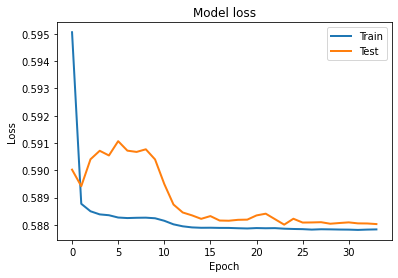

In [56]:
ae.plot_model()

In [57]:
ae.save_model('test.hdf5')